# What is Machine Learning?

# Introducing Scikit-Learn

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

## Supervised Learning: Tip Linear Regression

In [ ]:
# use this dataset from seaborn
tips = sns.load_dataset('tips') 

# convert categorical data to numerical data
tips['sex'] = tips['sex'].map({'Male': 0, 'Female': 1})
tips['smoker'] = tips['smoker'].map({'No': 0, 'Yes': 1})
tips['day'] = tips['day'].map({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})
tips['time'] = tips['time'].map({'Lunch': 0, 'Dinner': 1})

# Define data
X = tips[['total_bill']]
y = tips['tip']
tips.head() 

In [ ]:
# Split data into training and tests sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, 
                                                random_state=99)

# Train the model
from sklearn.linear_model import LinearRegression   # 1. Choose the model class
model = LinearRegression()                          # 2. instantiate model
model.fit(Xtrain, ytrain)                           # 3. fit model to data
ypred = model.predict(Xtest)                        # 4. predict on new data

# Evaluate the model
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

In [ ]:
# Plot the Model
plt.scatter(Xtest, ytest, color='green', label='Actual Data')
plt.plot(Xtest, ypred, color='orange', linewidth=2, label='Regression line')
plt.xlabel('Total Bill')
plt.ylabel('Actual Tip')
plt.title('Tip based on Total Bill')
plt.legend();

In [ ]:
# Plot the Model
plt.scatter(ytest, ypred, color='green')
#plt.plot(ytest, ypred, color='orange', linewidth=2, label='Regression line')
plt.xlabel('Actual Tip')
plt.ylabel('Predicted Tip')
plt.title('Actual Tip vs. Predicted Tip');

## Supervised Learning: Taxis Classifications

In [ ]:
taxis = sns.load_dataset('taxis')
taxis.head()

In [ ]:
taxis = taxis.drop(columns=['pickup', 'dropoff', 'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough'])

taxis['ride_type'] = taxis['distance'].apply(lambda x: 'short' if x < 5 else 'long')

sns.pairplot(taxis, hue='ride_type', height=1.5);

In [ ]:
X_taxis = taxis.drop('ride_type',axis=1)
y_taxis = taxis['ride_type']

Xtrain, Xtest, ytrain, ytest = train_test_split(X_taxis, y_taxis, random_state=1)

from sklearn.naive_bayes import GaussianNB  # 1. Choose the model class
model = GaussianNB()                        # 2. instantiate model
model.fit(Xtrain, ytrain)                   # 3. fit model to data
y_model = model.predict(Xtest)              # 4. predict on new data

accuracy_score(ytest, y_model)

## Unsupervised learning: Wine Dimensionality

In [ ]:
# can use this dataset from scikit-learn without pre-processing
from sklearn.datasets import load_wine
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df

In [ ]:
X = wine.data

from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X)                           # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X)              # 4. Transform the data to two dimensions

wine_df['PCA1'] = X_2D[:, 0]
wine_df['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='target', data=wine_df, fit_reg=False);

In [ ]:
from sklearn.mixture import GaussianMixture     # 1. Choose the model class
model = GaussianMixture(n_components=3,
            covariance_type='full')             # 2. Instantiate the model with hyperparameters
model.fit(X)                                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X)                        # 4. Determine cluster labels

wine_df['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=wine_df, hue='target',
           col='cluster', fit_reg=False);

## Unsupervised learning: Breast Cancer Clustering

In [ ]:
# can use this dataset from scikit-learn without pre-processing
from sklearn.datasets import load_breast_cancer
BC = load_breast_cancer()
BC_df = pd.DataFrame(data=BC.data, columns=BC.feature_names)
BC_df['target'] = BC.target
BC_df

In [ ]:
X = BC.data

from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X)                           # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X)              # 4. Transform the data to two dimensions

BC_df['PCA1'] = X_2D[:, 0]
BC_df['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='target', data=BC_df, fit_reg=False);

In [ ]:
from sklearn.mixture import GaussianMixture     # 1. Choose the model class
model = GaussianMixture(n_components=2,
            covariance_type='full')             # 2. Instantiate the model with hyperparameters
model.fit(X)                                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X)   

BC_df['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=BC_df, hue='target',
           col='cluster', fit_reg=False);

## Hand Written Digits

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [ ]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)

In [ ]:
X = digits.data
y = digits.target

plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

# Hyperparameters and Model Validation

## Model Validation

### The Wrong Way

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X, y)
y_model = model.predict(X)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

### The Correct Way

In [ ]:
from sklearn.model_selection import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

## Selecting the Best Model

### The Bias-variance trade-off

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def make_data(N=30, err=0.8, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

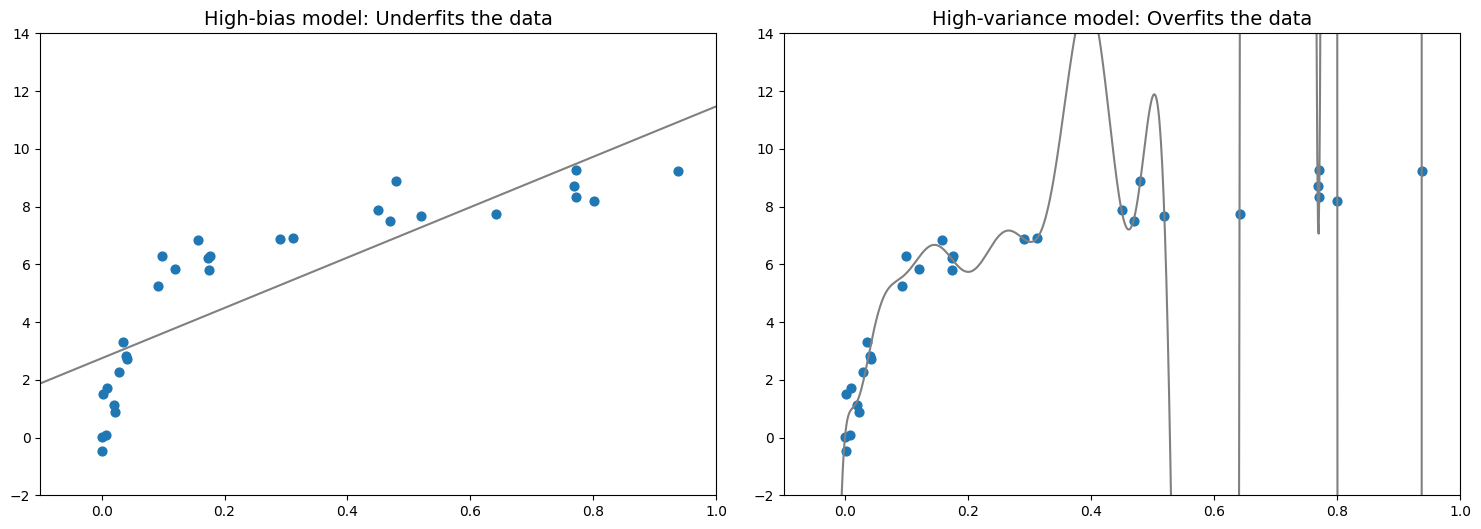

In [6]:
X, y = make_data()
xfit = np.linspace(-0.1, 1.0, 1000)[:, None]
model1 = PolynomialRegression(1).fit(X, y)
model20 = PolynomialRegression(20).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X.ravel(), y, s=40)
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=14)

ax[1].scatter(X.ravel(), y, s=40)
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14)
fig.savefig('05.03-bias-variance.png')

### Validation curves in Scikit-Learn

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [8]:
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

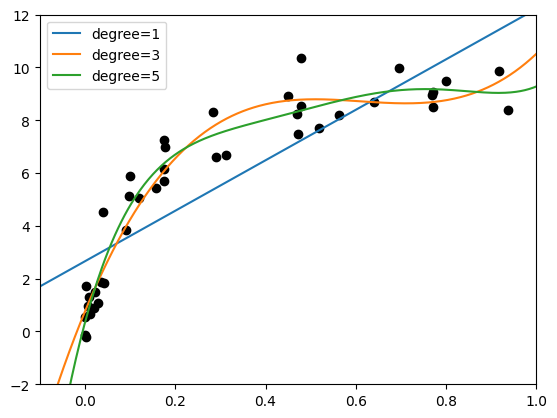

In [9]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

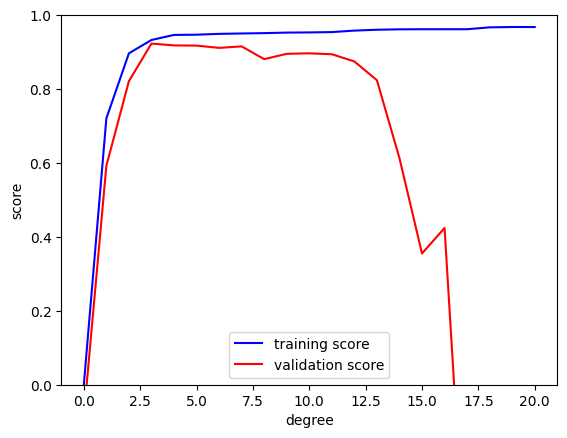

In [10]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import numpy as np

degree = np.arange(0, 21)
param_name = 'polynomialfeatures__degree'

train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          param_name=param_name, param_range=degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')
plt.show()

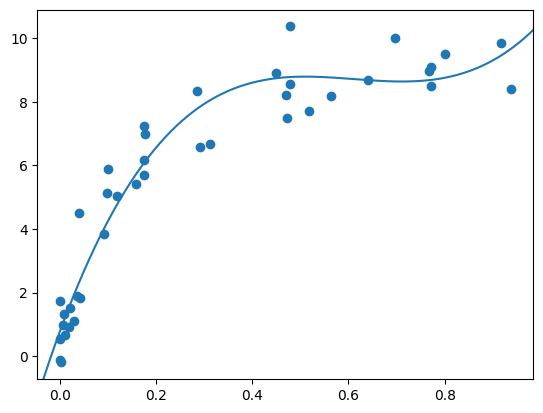

In [11]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

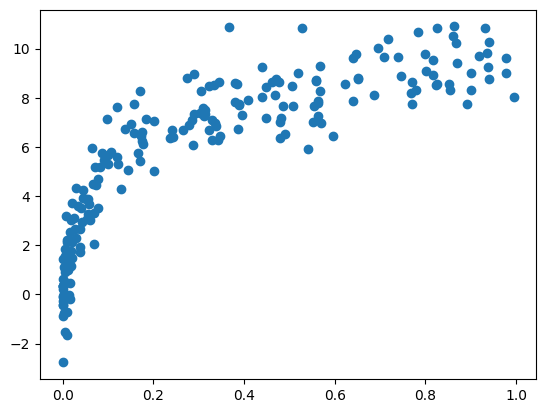

In [12]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

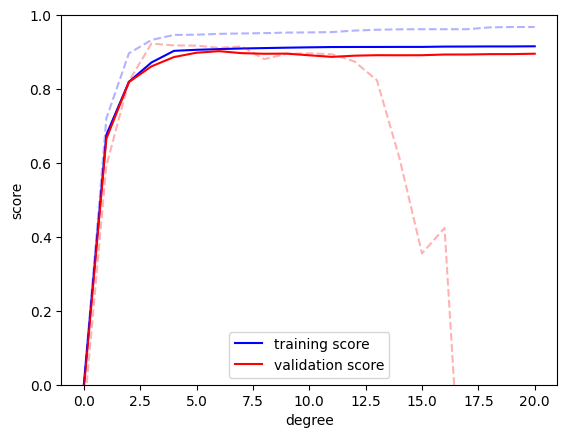

In [13]:
degree = np.arange(21)
param_name = 'polynomialfeatures__degree'

train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                          param_name=param_name, param_range=degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

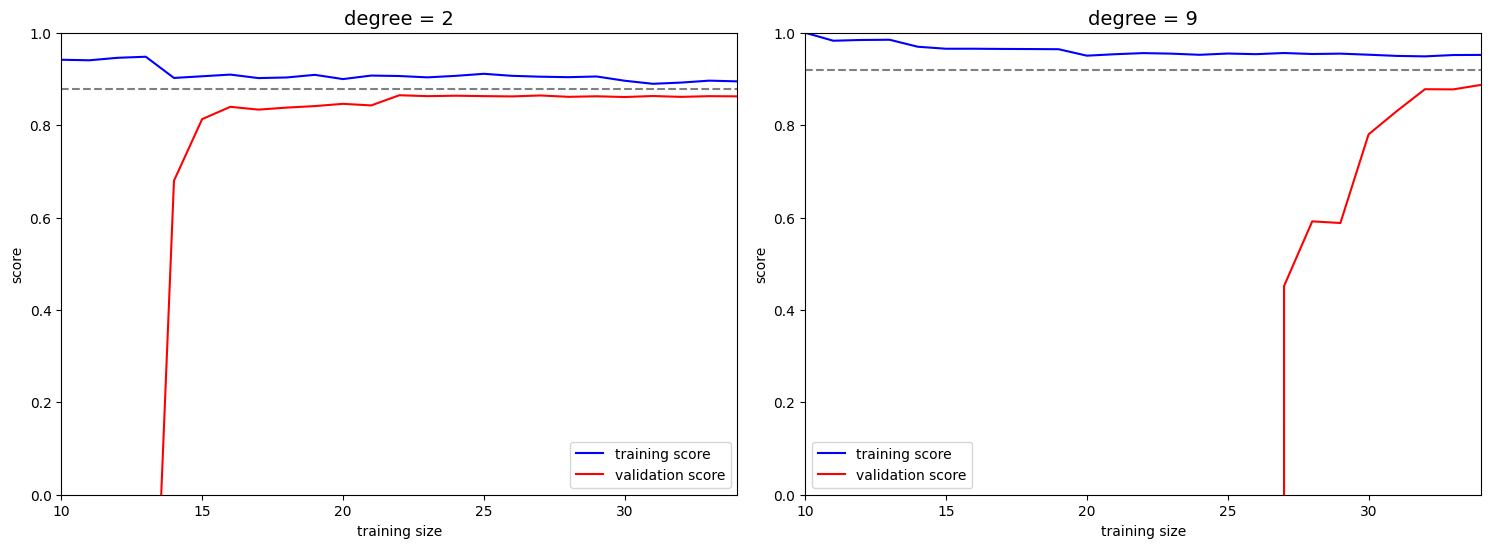

In [15]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

# Feature Engineering

# In-Depth: Support Vector Machines

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## Motivating Support Vector Machines

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

### Beyond Linear Boundaries

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(clf, plot_support=False);

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

r = np.exp(-(X ** 2).sum(1))

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='winter')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-45, 30], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# Vehicle Recognition 

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

In [ ]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

In [ ]:
fig, ax = plt.subplots(5, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Application: A Face Detection Pipeline

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from skimage import data, color, feature, io, transform
import skimage.data
import os
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [ ]:
image = color.rgb2gray(data.astronaut())
hog_vec, hog_vis = feature.hog(image, visualize=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='Blues')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features');

In [ ]:
# Getting vehicle classes from folder names
dataset_path = r'C:\Users\zscon\Desktop\SSE_591\repo\SSE591_Week5\SSE591_Week5\Vehicle images'
classes = os.listdir(dataset_path)
print(f'Classes: {classes}')

In [ ]:
# Read Images and Labels into lists

images = []
labels = []

for class_name in classes:
    class_dir = os.path.join(dataset_path, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        
        # Check if the file has a valid image extension
        img = io.imread(img_path)  # reads the image file into a NumPy array using skimage
        
        if img.ndim == 2:  # Grayscale image
            img_resized = transform.resize(img, (128, 64))  # Resize image
        elif img.shape[-1] == 4:  # Image has 4 channels (RGBA)
            img = img[:, :, :3]  # Remove the alpha channel
            img_resized = transform.resize(img, (128, 64))  # Resize image
            img_resized = color.rgb2gray(img_resized)  # Convert to grayscale
        elif img.shape[-1] == 3:  # Image has 3 channels (RGB)
            img_resized = transform.resize(img, (128, 64))  # Resize image
            img_resized = color.rgb2gray(img_resized)  # Convert to grayscale
        else:
            continue  # Skip images that do not meet the above criteria
        
        images.append(img_resized)
        labels.append(class_name)

In [ ]:
# convert lists to NumPy Arrays
X = np.array(images)                # features matrix
y = np.array(labels)                # target vector

In [ ]:
# Extract HOG features from each image
hog_features = []
for image in X:
    features = feature.hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
    hog_features.append(features)

In [ ]:
# Convert HOG features and labels to numpy arrays
Vehicle = np.array(hog_features)
Type = LabelEncoder().fit_transform(y)

In [ ]:
Vehicle = X.reshape(X.shape[0], -1)     # convert dataset to be [n_samples, n_features]

Xtrain, Xtest, ytrain, ytest = train_test_split(Vehicle, Type, test_size=0.3, random_state=99)

 # Train RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
model = SVC(kernel='rbf', class_weight='balanced')
model.fit(Xtrain, ytrain)

# Make predictions on the test set
y_pred = model.predict(Xtest)

# Evaluate the classifier
print(f'Accuracy: {accuracy_score(ytest, y_pred)}')
print(classification_report(ytest, y_pred, target_names=classes))

# Plot an example of HOG features for visualization
image = X[0]
hog_image = feature.hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)[1]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(hog_image, cmap=plt.cm.gray)
plt.title('HOG Features')
plt.show()